> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This analysis is based on The Movie Database (TMDb) dataset, the dataset contains movie reviews, cast, ratings, and so on, this analysis is based on finding patterns in the dataset, the profit made on each movies, the most popular genres and so on...


### Dataset Description 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is..


The first dataset contains the following features:-

    movie_id - A unique identifier for each movie.
    cast - The name of lead and supporting actors.
    crew - The name of Director, Editor, Composer, Writer etc.
    title - The title of the movie.

The second dataset has the following features:-

    budget - The budget in which the movie was made.
    genre - The genre of the movie, Action, Comedy ,Thriller etc.
    homepage - A link to the homepage of the movie.
    id - This is infact the movie_id as in the first dataset.
    keywords - The keywords or tags related to the movie.
    original_language - The language in which the movie was made.
    original_title - The title of the movie before translation or adaptation.
    overview - A brief description of the movie.
    popularity - A numeric quantity specifying the movie popularity
    production_companies - The production house of the movie.
    production_countries - The country in which it was produced.
    release_date - The date on which it was released.
    revenue - The worldwide revenue generated by the movie.
    runtime - The running time of the movie in minutes.
    spoken language - The languge spoken in the movie.
    status - "Released" or "Rumored".
    tagline - Movie's tagline.
    title - Title of the movie.
    vote_average - average ratings the movie recieved.
    vote_count - the count of votes recieved.

### Question(s) for Analysis
>**RESEARCH QUESTION 1**: What is the profit made on each movies and the correlation between profit and other parameters?

> **RESEARCH QUESTION 2**: What genre of movies have higher popularity and rating?
This will be done by splitting the genres, and carry out EDA analysis on it.

In [1]:
# Importing all the packages needed for the project

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# A little peak into our first data

tmdb_credits = pd.read_csv('tmdb_5000_credits.csv')
tmdb_credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [3]:
# A little peak into our second data

tmdb_movies = pd.read_csv('tmdb_5000_movies.csv')
tmdb_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
# CHECKING THE DATA

In [5]:
tmdb_credits.shape

(4803, 4)

In [6]:
tmdb_movies.shape

(4803, 20)

In [7]:
# Information on the first data

tmdb_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [8]:
# Information on the second data

tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [9]:
# Other informations like mean, std and others on first data

tmdb_credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [10]:
# Other informations like mean, std and others on second data

tmdb_movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [11]:
# COLUMNS IN THE FIRST DATA

tmdb_credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [12]:
# COLUMNS IN THE SECOND DATA

tmdb_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [13]:
# RENAMING THE 'ID' COLUMN TO 'MOVIE_ID' IN OTHER TO HAVE THE SAME COLUMN IN BOTH DATA

tmdb_movies.rename(columns = {'id':'movie_id'},inplace=True)

In [14]:
tmdb_movies.head(1)

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [15]:
# JOINING THE DATA TOGETHER USING MOVIE_ID COLUMN

tmdb = tmdb_credits.merge(tmdb_movies,on='movie_id')
tmdb.head(2)

,movie_id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [16]:
# Checking the first row in the genres column

tmdb['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [17]:
# Checking the combined column

tmdb.columns

Index(['movie_id', 'title_x', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title_y', 'vote_average', 'vote_count'],
      dtype='object')

In [18]:
# features such as "original_title", "homepage","title_y"....  etc will be dropped

new_tmdb = tmdb.drop(["title_y","production_companies","spoken_languages","original_title", "homepage","tagline", "keywords","overview",], axis=1)

#view the new dataset new_df
new_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4803 non-null   int64  
 1   title_x               4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   crew                  4803 non-null   object 
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   original_language     4803 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_countries  4803 non-null   object 
 9   release_date          4802 non-null   object 
 10  revenue               4803 non-null   int64  
 11  runtime               4801 non-null   float64
 12  status                4803 non-null   object 
 13  vote_average          4803 non-null   float64
 14  vote_count            4803 non-null   int64  
dtypes: float64(3), int64(

In [19]:
# Checking for duplicated values

new_tmdb.duplicated().sum()

0

In [20]:
# Checking for missing values

new_tmdb.isnull().sum()

movie_id                0
title_x                 0
cast                    0
crew                    0
budget                  0
genres                  0
original_language       0
popularity              0
production_countries    0
release_date            1
revenue                 0
runtime                 2
status                  0
vote_average            0
vote_count              0
dtype: int64

In [21]:
# Filling the missing data with unknown attribute

new_tmdb.fillna("unknown", inplace=True)
new_tmdb.isnull().sum()

movie_id                0
title_x                 0
cast                    0
crew                    0
budget                  0
genres                  0
original_language       0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
status                  0
vote_average            0
vote_count              0
dtype: int64

In [22]:
# Checking the cleaned data

new_tmdb.head(1)

,movie_id,title_x,cast,crew,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,status,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,7.2,11800


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Profit made and correlation between profit and other parameters!)

In [23]:
# Calculating the profit by subtracting the revenue from budget

new_tmdb["profit"] = new_tmdb["revenue"] - new_tmdb["budget"]

new_tmdb.head()

,movie_id,title_x,cast,crew,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,profit
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,7.2,11800,2550965087
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,6.9,4500,661000000
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,6.3,4466,635674609
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,Released,7.6,9106,834939099
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,Released,6.1,2124,24139100


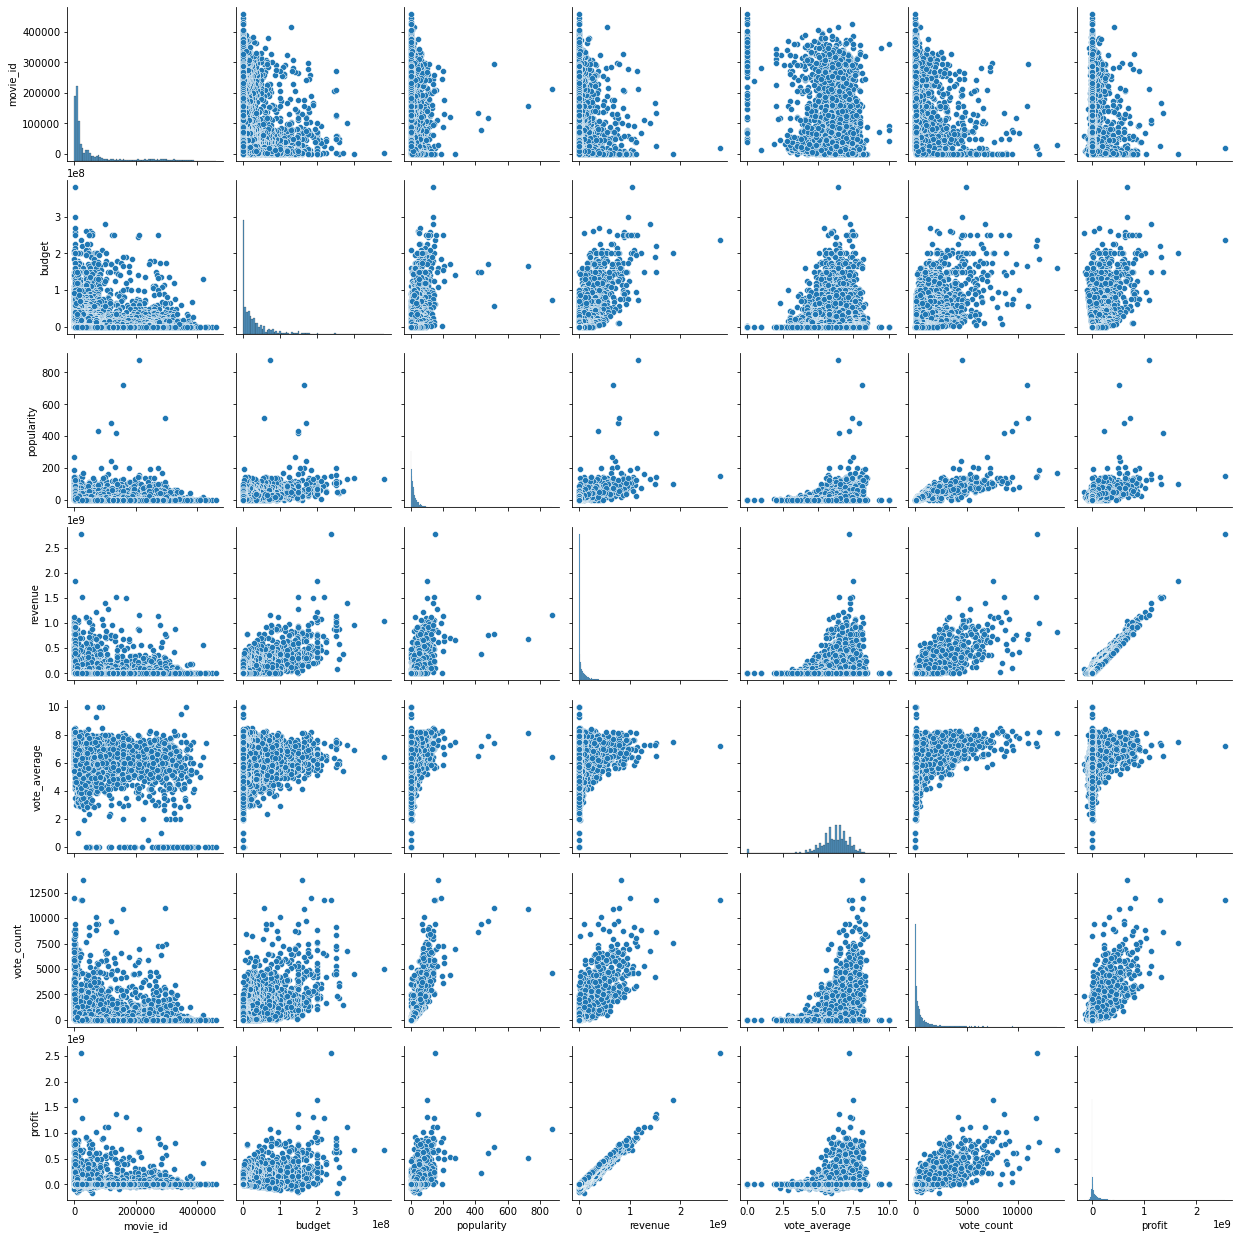

In [24]:
# Plot of all the columns using sns pairplot to check the correlation between all the columns

sns.pairplot(new_tmdb)

From the scatter plot above it is evident that as profit increases revenue increaases as well. 
This is a somewhat perfect corelations between variables.

### Research Question 2  (Genres with most popularity and profit!)

In [25]:
# Checking the first few data in our df dataset

new_tmdb.head(1)

,movie_id,title_x,cast,crew,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,profit
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,7.2,11800,2550965087


In [26]:
# Getting rid of the debris in the genres column to have absolute name like action etc

import ast
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L 

In [27]:
# Applying it to our genres column

new_tmdb['genres']= new_tmdb['genres'].apply(convert)

In [28]:
# Splitting the newly cleaned genres column with comma

new_tmdb['new_genres'] = new_tmdb.genres.apply(', '.join)

In [29]:
new_tmdb.head(1)

,movie_id,title_x,cast,crew,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,profit,new_genres
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[Action, Adventure, Fantasy, Science Fiction]",en,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,7.2,11800,2550965087,"Action, Adventure, Fantasy, Science Fiction"


In [30]:
# Splitting of the new_genres to have different values

genres_df = new_tmdb.assign(new_genres=new_tmdb.new_genres.str.split(',')).explode('new_genres')
genres_df.head(2)

,movie_id,title_x,cast,crew,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,profit,new_genres
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[Action, Adventure, Fantasy, Science Fiction]",en,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,7.2,11800,2550965087,Action
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[Action, Adventure, Fantasy, Science Fiction]",en,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,7.2,11800,2550965087,Adventure


In [31]:
# Dropping the genres column fully

genres_df.drop('genres',axis=1,inplace=True)
genres_df.head(1)

,movie_id,title_x,cast,crew,budget,original_language,popularity,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,profit,new_genres
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,en,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,7.2,11800,2550965087,Action


In [32]:
# Renaming the title_x and new_genres to title and genres respectively

genres_df.rename(columns={'title_x':'title', 'new_genres':'genres'},inplace=True)

In [33]:
genres_df.head()

,movie_id,title,cast,crew,budget,original_language,popularity,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,profit,genres
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,en,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,7.2,11800,2550965087,Action
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,en,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,7.2,11800,2550965087,Adventure
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,en,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,7.2,11800,2550965087,Fantasy
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,en,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,7.2,11800,2550965087,Science Fiction
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,en,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,6.9,4500,661000000,Adventure


In [34]:
# Now lets group a data called genres_pp_df where pp == popularity and profit. After that we view the data.

genres_pp_df=genres_df.groupby(['genres'],as_index=False)['popularity', 'profit'].mean()
genres_pp_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_10288\2933078206.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genres_pp_df=genres_df.groupby(['genres'],as_index=False)['popularity', 'profit'].mean()


,genres,popularity,profit
0,,0.167952,-7.240254e+04
1,Action,35.572245,1.189053e+08
2,Adventure,39.426239,1.400562e+08
3,Animation,42.640615,1.426758e+08
4,Comedy,23.395075,6.594628e+07


This is the new table for popularity and profit groped by genres

In [35]:
# Top 10 genre by popularity index

genres_pp_df.sort_values(by=['popularity'], ascending = False).head(10)

,genres,popularity,profit
3,Animation,42.640615,1.426758e+08
36,Science Fiction,42.053748,1.192465e+08
2,Adventure,39.426239,1.400562e+08
22,Adventure,39.057579,1.453628e+08
9,Fantasy,37.364682,1.430460e+08
28,Family,36.147438,1.167240e+08
1,Action,35.572245,1.189053e+08
23,Animation,35.359647,1.741637e+08
16,Science Fiction,35.226780,9.651139e+07
29,Fantasy,33.821786,9.502044e+07


In [36]:
# Defining a function for the genres plot

def gtop10(value1,value2,order):
    result1=genres_pp_df.sort_values(value1, ascending = order).head(10)
    pl=sns.barplot(y=value2,x=value1,data=result1)
    title=plt.title ("Top 10 {}".format(value2))
    yl=plt.ylabel("{}".format(value2))
    xl=plt.xlabel("{}".format(value1))
    return result1,pl,title,yl,xl

The table above shows the Animation genre as the most popular next to Science Fiction

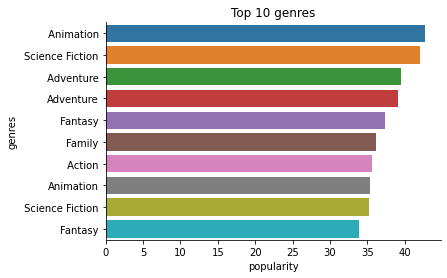

In [37]:
# Plot for top 10 genres by popularity index

gtop10('popularity','genres', False)
sns.despine()
plt.show()

Movies of genre "Animation" had the highest popularity index

<a id='conclusions'></a>
## Conclusions

> **Findings**: 1. From the analysis, it can be observed that the higher revenue the higher the profit as shown in the plot.
                
                2. The movie genres with most popularity is the "Animation" genres.
                
                
      
> **Limitations**: There are some limitations concerning this project, the common one being the missing dataset from some columns, I dropped many of them.



> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])